[ 0.00891113  0.00823975  0.00778198 ... -0.12072754 -0.10348511
 -0.08435059]


C:\Users\behro\AppData\Local\Temp\ipykernel_11936\308947593.py:32: RuntimeWarning: divide by zero encountered in scalar divide
  bpm.append(60 * (dur_score / dur_audio))


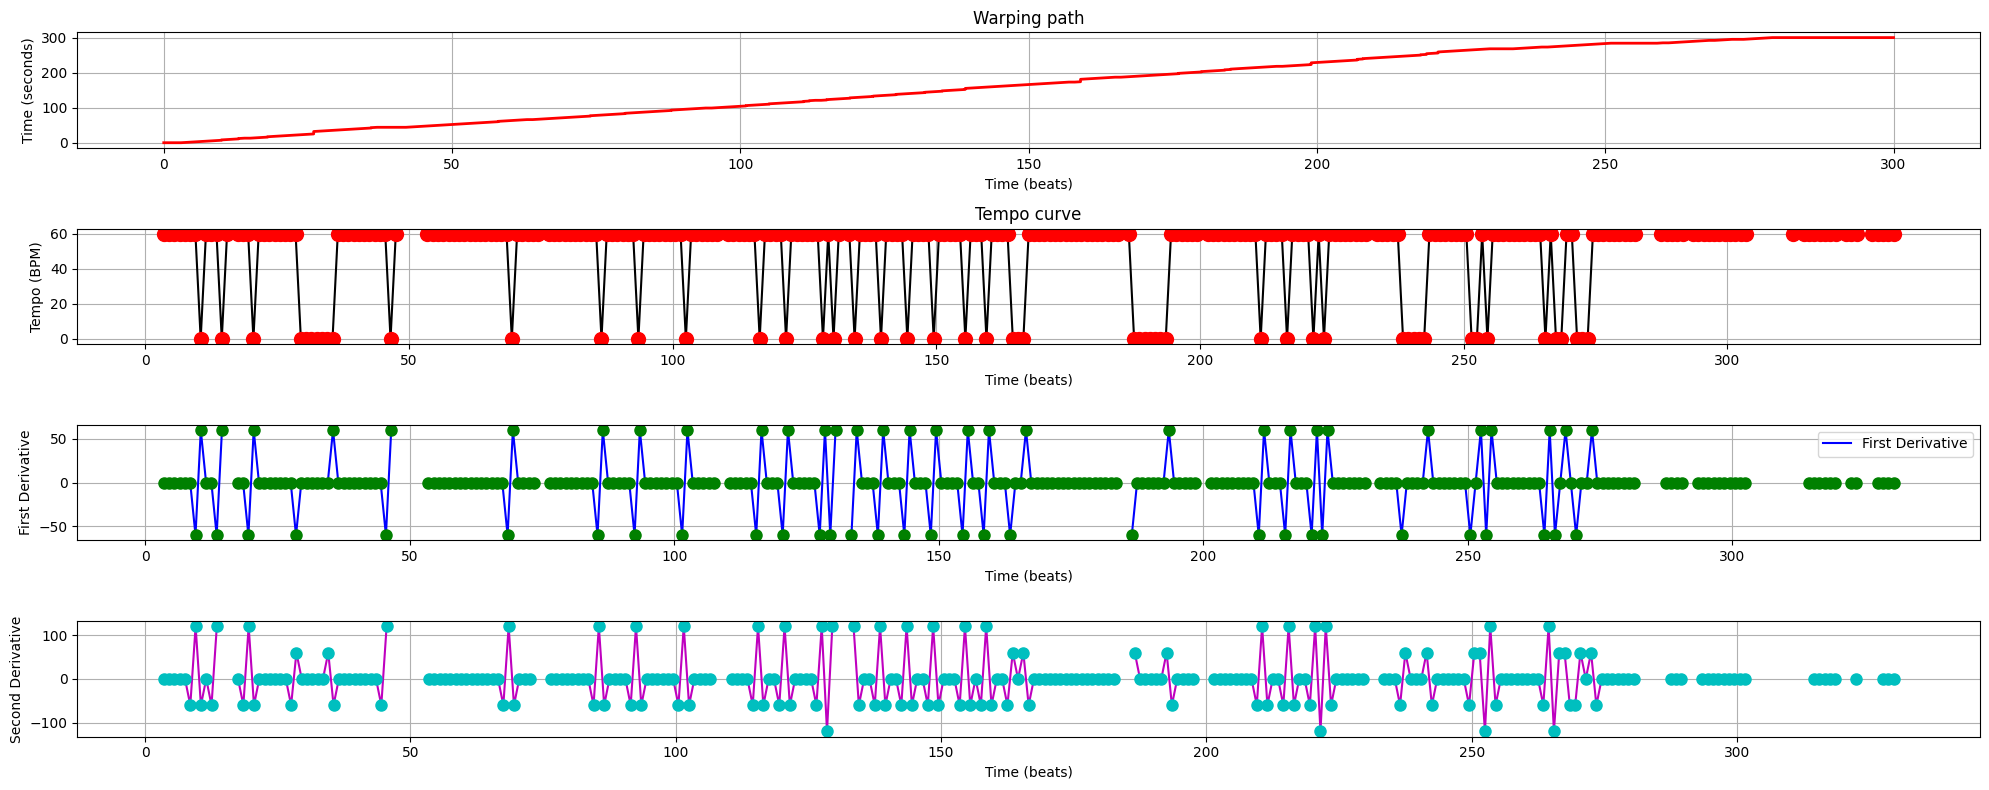

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display

import sys
sys.path.append('..')
import libfmp.c3


def plot(pathX:str,PathY:str,start:int=0,end:int=30,Fs:int=22050):
    X_wav, Fs = librosa.load(fn_wav_X, sr=Fs)
    Y_wav, Fs = librosa.load(fn_wav_Y, sr=Fs)
    
    X_wav = X_wav[start*Fs:Fs*end]
    Y_wav = Y_wav[start*Fs:Fs*end]
    N = 4410
    H = 2205
    X = librosa.feature.chroma_stft(y=X_wav, sr=Fs, tuning=0, norm=2, hop_length=H, n_fft=N)
    Y = librosa.feature.chroma_stft(y=Y_wav, sr=Fs, tuning=0, norm=2, hop_length=H, n_fft=N)
    C = libfmp.c3.compute_cost_matrix(X, Y)
    D = libfmp.c3.compute_accumulated_cost_matrix(C)
    P = libfmp.c3.compute_optimal_warping_path(D)

    bpm = []
    pos_audio1, pos_score1 = P[0, :]
    for pos_audio2, pos_score2  in P[1:]:
        dur_audio = pos_audio2 - pos_audio1
        dur_score = pos_score2 - pos_score1
        bpm.append(60 * (dur_score / dur_audio))
        pos_audio1, pos_score1 = pos_audio2, pos_score2

    # Calculate derivatives
    first_derivative = np.diff(bpm, n=1)
    second_derivative = np.diff(bpm, n=2)

    # X-axis values for derivatives
    x_bpm = np.arange(len(bpm)) + 0.5
    x_first_derivative = x_bpm[:-1]  # Adjusted for first derivative
    x_second_derivative = x_bpm[:-2]  # Adjusted for second derivative

    # Plotting
    fig, ax = plt.subplots(4, 1, figsize=(20, 8))

    ax[0].plot(P[:, 1], P[:, 0], 'r-', linewidth=2)
    ax[0].grid()
    ax[0].set_xlabel('Time (beats)')
    ax[0].set_ylabel('Time (seconds)')
    ax[0].set_title('Warping path')
    ax[1].plot(np.arange(len(bpm)) + 0.5, bpm, 'k-')
    ax[1].plot(np.arange(len(bpm)) + 0.5, bpm, 'ro', markersize=10)

    ax[1].grid()
    ax[1].set_xlabel('Time (beats)')
    ax[1].set_ylabel('Tempo (BPM)')
    ax[1].set_title('Tempo curve')

    # Plot first derivative
    ax[2].plot(x_first_derivative, first_derivative, 'b-', label='First Derivative')
    ax[2].plot(x_first_derivative, first_derivative, 'go', markersize=8)
    ax[2].grid()
    ax[2].set_xlabel('Time (beats)')
    ax[2].set_ylabel('First Derivative')
    ax[2].legend()

    # Plot second derivative
    ax[3].plot(x_second_derivative, second_derivative, 'm-', label='Second Derivative')
    ax[3].plot(x_second_derivative, second_derivative, 'co', markersize=8)
    ax[3].grid()
    ax[3].set_xlabel('Time (beats)')
    ax[3].set_ylabel('Second Derivative')
    plt.tight_layout() 


Fs = 22050
fn_wav_X = os.path.join('1_Audio', 'Beethoven_Op007-01_FJ62.wav')
fn_wav_Y = os.path.join('1_Audio', 'Beethoven_Op007-01_AS35.wav')
plot(fn_wav_X,fn_wav_Y,Fs=Fs)